# Лабораторная работа №2. EDA (исследовательский анализ данных)


**ЗАДАНИЕ.** 
<br>
Выполнить предварительную обработку данных в файле <b>DataSet2.csv</b>, затем реализуйте основные техники EDA (представленные в данном примере проекта по EDA), сопровождая полученные данные соответствующими выводами.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, date, time

In [2]:
data= pd.read_csv('../data/DataSet2.csv')

## Предварительная обработка данных

### Оценка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

In [4]:
data.head(10)

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
6,6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019",...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079",...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562


<font size=4>**Получаем следующую характеристику данных:**
- в 20-ти из 29-ти столбцах пропущены значения;
- в столбце 'Critic Consensus' пропущенно очень много значений;
- в некоторых столбцах необходимо поменять тип данных.<font size=4>


<font size=4>**Столбцы с неподходящими типами данных:**

- изменение типа данных столбца 'IMDB Votes' с object на float;
- изменение типа данных столбца 'Original Release Date' с object на тип дата;
- изменение типа данных столбца 'Streaming Release Date' с object на тип дата.

<font>

### Вывод описательной статистики

In [5]:
data.describe()

,Unnamed: 0,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
count,571.000000,571.000000,571.000000,571.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000,439.000000
mean,285.000000,1973.357268,124.894921,7.570403,87.503417,110.697039,82.428246,5.154145e+05,21.861048,98.471526,12.275626
std,164.977776,29.315738,26.322817,0.559652,11.690622,119.541406,10.927897,3.623107e+06,21.615492,107.798554,19.310232
min,0.000000,1927.000000,66.000000,5.600000,29.000000,5.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,84.000000,25.000000,78.000000,6.637500e+03,5.000000,21.500000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,91.000000,54.000000,85.000000,3.716600e+04,11.000000,49.000000,5.000000
75%,427.500000,2001.000000,136.500000,7.900000,95.000000,199.000000,90.000000,1.255365e+05,45.000000,163.500000,15.000000
max,570.000000,2021.000000,238.000000,9.300000,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000


### Обработка пропущенных значений

In [6]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Critic Consensus                    40.630473
Audience Status                     23.642732
Authors                             23.467601
Directors                           23.467601
Movie Info                          23.292469
Streaming Release Date              23.292469
Audience Rating                     23.117338
Audience Count                      23.117338
Tomatometer Count                   23.117338
Production Company                  23.117338
Tomatometer Top Critics Count       23.117338
Genres                              23.117338
Tomatometer Fresh Critics Count     23.117338
Content Rating                      23.117338
Tomatometer Rotten Critics Count    23.117338
Tomatometer Status                  23.117338
Actors                              23.117338
Original Release Date               23.117338
Tomatometer Rating                  23.117338
Unnamed: 0                           0.000000
Film                                 0.000000
IMDB Votes                        

<font size=4><b>Предположения для заполнения пропущенного значения:</b>

- пропущенные значения в столбце 'Critic Consensus' - это отсуствия критики, ни от чего не зависящие, их можно заменить 'unknown', аналогично с 'Movie Info', 'Authors' и другими;
- обработать пропущенные значения в столбце 'Content Rating' в соответствии с жанром фильма;
- на место пропусков 'Genres' продублировать значения жанров фильмов;
- обработать недостающие значения в столбце 'Directors', 'Production Company' по 'Film Studio/..';
- 'Original Release Date' будет равно '01.01.'Year of Release'';
- 'Streaming Release Date' заполню датой релиза, если же фильм старше, чем дата появления первого стриминга (Netflix), то датой появления стриминга.
</font>

Заполню пропущенные значения столбцов, которые не имеют прямой связи с другими столбцами, 'unknown'.

In [7]:
column_unknown=['Critic Consensus','Movie Info','Authors','Actors']
for column in column_unknown:
    data[column]=data[column].fillna('unknown')

На место пропусков 'Genres' продублировать значения жанров фильмов

In [8]:
f_genres = lambda x : x
data['Genres'] = data['Movie Genre'].transform(f_genres)

Заполняю некоторые признаки по моде других признаков:

In [9]:
f_content = lambda x: x.mode().iat[0] if x.notna().any() else 'NR'
content_rating = data.groupby('Movie Genre')['Content Rating'].transform(f_content)
data['Content Rating'] = data['Content Rating'].fillna(content_rating)

f = lambda x: x.mode().iat[0] if x.notna().any() else 'unknown'
fillna_directors = data.groupby('Film Studio/Producer(s)')['Directors'].transform(f)
data['Directors'] = data['Directors'].fillna(fillna_directors)

fillna_prod_company = data.groupby('Film Studio/Producer(s)')['Production Company'].transform(f)
data['Production Company'] = data['Production Company'].fillna(fillna_prod_company)

fillna_tomat_status = data.groupby('Directors')['Tomatometer Status'].transform(f)
data['Tomatometer Status'] = data['Tomatometer Status'].fillna(fillna_tomat_status)

fillna_aud_status = data.groupby('Directors')['Audience Status'].transform(f)
data['Audience Status'] = data['Audience Status'].fillna(fillna_aud_status)


'Original Release Date' будет равно "01.01.'Year of Release'".<br>
'Streaming Release Date' заполню датой релиза, если же фильм старше, чем дата появления первого стриминга (Netflix), то датой появления стриминга.

In [10]:
f_date = lambda x: str(x)+'-01-01'
data['Original Release Date'] = data['Year of Release'].transform(f_date)

data ['Original Release Date'] = pd.to_datetime(data['Original Release Date'],format = '%Y-%m-%d')

f_date_stream = lambda x: x if (x > pd.Timestamp(date(2007, 1, 1))) else date(2007, 1, 1)
data['Streaming Release Date'] = data['Original Release Date'].transform(f_date_stream)

data ['Streaming Release Date'] = pd.to_datetime(data['Streaming Release Date'],format = '%Y-%m-%d')

In [11]:
data.isna().sum()

Unnamed: 0                            0
Film                                  0
Oscar Year                            0
Film Studio/Producer(s)               0
Award                                 0
Year of Release                       0
Movie Time                            0
Movie Genre                           0
IMDB Rating                           0
IMDB Votes                            0
Movie Info                            0
Genres                                0
Critic Consensus                      0
Content Rating                        0
Directors                             0
Authors                               0
Actors                                0
Original Release Date                 0
Streaming Release Date                0
Production Company                    0
Tomatometer Status                    0
Tomatometer Rating                  132
Tomatometer Count                   132
Audience Status                       0
Audience Rating                     132


Проверим корреляцию между некоторыми признаками.

In [12]:
data[['IMDB Rating','Tomatometer Count','Tomatometer Rating', 'Audience Rating','Audience Count','Movie Time','Year of Release','Tomatometer Rotten Critics Count', 'Tomatometer Fresh Critics Count', 'Tomatometer Top Critics Count']].corr()


,IMDB Rating,Tomatometer Count,Tomatometer Rating,Audience Rating,Audience Count,Movie Time,Year of Release,Tomatometer Rotten Critics Count,Tomatometer Fresh Critics Count,Tomatometer Top Critics Count
IMDB Rating,1.000000,0.268721,0.466360,0.859044,0.171507,0.292357,0.329910,0.101679,0.279789,0.294503
Tomatometer Count,0.268721,1.000000,0.111996,0.157585,0.067923,0.091782,0.805810,0.662408,0.990934,0.943635
Tomatometer Rating,0.466360,0.111996,1.000000,0.506349,-0.007486,-0.188743,0.034520,-0.337102,0.184758,0.114217
Audience Rating,0.859044,0.157585,0.506349,1.000000,-0.014034,0.145336,0.238831,-0.002000,0.175147,0.192354
Audience Count,0.171507,0.067923,-0.007486,-0.014034,1.000000,0.190135,0.094606,0.065931,0.063454,0.121112
Movie Time,0.292357,0.091782,-0.188743,0.145336,0.190135,1.000000,0.242018,0.166130,0.071951,0.114933
Year of Release,0.329910,0.805810,0.034520,0.238831,0.094606,0.242018,1.000000,0.567570,0.792311,0.847781
Tomatometer Rotten Critics Count,0.101679,0.662408,-0.337102,-0.002000,0.065931,0.166130,0.567570,1.000000,0.555764,0.608254
Tomatometer Fresh Critics Count,0.279789,0.990934,0.184758,0.175147,0.063454,0.071951,0.792311,0.555764,1.000000,0.937991
Tomatometer Top Critics Count,0.294503,0.943635,0.114217,0.192354,0.121112,0.114933,0.847781,0.608254,0.937991,1.000000


Между 'Audience Rating' и 'IMDB Rating' высокая корреляция, примерно 0.9, значит можем заполнить 'Audience Rating' по соотношению значений это столбца и 'IMDB Rating'

In [13]:
data.describe()[['IMDB Rating','Audience Rating']]

,IMDB Rating,Audience Rating
count,571.000000,439.000000
mean,7.570403,82.428246
min,5.600000,21.000000
25%,7.300000,78.000000
50%,7.600000,85.000000
75%,7.900000,90.000000
max,9.300000,98.000000
std,0.559652,10.927897


In [14]:
f_aud_rating = lambda x: round(x*(82.4/7.6))
data['Audience Rating'] = data['Audience Rating'].fillna(data['IMDB Rating'].transform(f_aud_rating))

Tomatometer Count коррелирует с Year of Relise

In [15]:
data.describe()[['Tomatometer Count', 'Year of Release']]

,Tomatometer Count,Year of Release
count,439.000000,571.000000
mean,110.697039,1973.357268
min,5.000000,1927.000000
25%,25.000000,1944.000000
50%,54.000000,1972.000000
75%,199.000000,2001.000000
max,574.000000,2021.000000
std,119.541406,29.315738


In [16]:
f_tomat_count = lambda x: round(x*(110.7/1973))
data['Tomatometer Count'] = data['Tomatometer Count'].fillna(data['Year of Release'].transform(f_tomat_count))

Все Tomatometer ... Count +- коррелируют с Tomatometer Count (0.7 - 1)

In [17]:
data.describe()[['Tomatometer Count', 'Tomatometer Rotten Critics Count', 'Tomatometer Fresh Critics Count', 'Tomatometer Top Critics Count']]

,Tomatometer Count,Tomatometer Rotten Critics Count,Tomatometer Fresh Critics Count,Tomatometer Top Critics Count
count,571.000000,439.000000,439.000000,439.000000
mean,110.588441,12.275626,98.471526,21.861048
min,5.000000,0.000000,3.000000,0.000000
25%,33.000000,2.000000,21.500000,5.000000
50%,82.000000,5.000000,49.000000,11.000000
75%,113.000000,15.000000,163.500000,45.000000
max,574.000000,182.000000,495.000000,69.000000
std,104.793232,19.310232,107.798554,21.615492


In [18]:
f_tomat_rotten = lambda x: round(x*(12.3/110.6))
data['Tomatometer Rotten Critics Count'] = data['Tomatometer Rotten Critics Count'].fillna(data['Tomatometer Count'].transform(f_tomat_rotten))

f_tomat_fresh = lambda x: round(x*(98.4/110.6))
data['Tomatometer Fresh Critics Count'] = data['Tomatometer Fresh Critics Count'].fillna(data['Tomatometer Count'].transform(f_tomat_fresh))

f_tomat_top = lambda x: round(x*(21.9/110.6))
data['Tomatometer Top Critics Count'] = data['Tomatometer Top Critics Count'].fillna(data['Tomatometer Count'].transform(f_tomat_top))


Изучив датасет, можно заметить, что рейтинг и статус напрямую зависят друг от друга. Значит, можно заполнить пропуски в столбцах рейтинга по статусу

In [19]:
table = pd.pivot_table(data, values=['Tomatometer Rating'], index=['Tomatometer Status'],columns=[])
table

,Tomatometer Rating
Tomatometer Status,
Certified-Fresh,91.091255
Fresh,85.153374
Rotten,44.384615


In [20]:
fillna_tomat_rating = data.groupby('Tomatometer Status')['Tomatometer Rating'].transform('mean')
data ['Tomatometer Rating'] = data ['Tomatometer Rating'].fillna(fillna_tomat_rating)

Похожая ситуация с Audience Count. В основном самые большие значения при Certified-Fresh, средние и высокие у Fresh и средние и низкие у Rotten

In [21]:
table = pd.pivot_table(data, values=['Audience Count'], index=['Tomatometer Status'],columns=[])
table

,Audience Count
Tomatometer Status,
Certified-Fresh,841628.874525
Fresh,29160.754601
Rotten,12719.153846


In [22]:
fillna_aud_count = data.groupby('Tomatometer Status')['Audience Count'].transform('mean')
data ['Audience Count'] = data ['Audience Count'].fillna(fillna_aud_count)

In [23]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Unnamed: 0                          0.0
Film                                0.0
Tomatometer Rotten Critics Count    0.0
Tomatometer Fresh Critics Count     0.0
Tomatometer Top Critics Count       0.0
Audience Count                      0.0
Audience Rating                     0.0
Audience Status                     0.0
Tomatometer Count                   0.0
Tomatometer Rating                  0.0
Tomatometer Status                  0.0
Production Company                  0.0
Streaming Release Date              0.0
Original Release Date               0.0
Actors                              0.0
Authors                             0.0
Directors                           0.0
Content Rating                      0.0
Critic Consensus                    0.0
Genres                              0.0
Movie Info                          0.0
IMDB Votes                          0.0
IMDB Rating                         0.0
Movie Genre                         0.0
Movie Time                          0.0


Все пропуски заполнены

### Коррекция типов данных

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        571 non-null    int64         
 1   Film                              571 non-null    object        
 2   Oscar Year                        571 non-null    object        
 3   Film Studio/Producer(s)           571 non-null    object        
 4   Award                             571 non-null    object        
 5   Year of Release                   571 non-null    int64         
 6   Movie Time                        571 non-null    int64         
 7   Movie Genre                       571 non-null    object        
 8   IMDB Rating                       571 non-null    float64       
 9   IMDB Votes                        571 non-null    object        
 10  Movie Info                        571 non-null    

In [25]:
f_date = lambda x: str(x)
data['Oscar Year'] = data['Oscar Year'].transform(f_date)
data['Year of Release'] = data['Year of Release'].transform(f_date)

data['Award'].replace("Nominee", 0, inplace=True)
data['Award'].replace("Winner", 1, inplace=True)
data['Award'] = data['Award'].astype(bool)

data['IMDB Votes'] = data['IMDB Votes'].str.replace(',', '').astype(int)
data['Tomatometer Count'] = data['Tomatometer Count'].astype(int)
data['Audience Count'] = data['Audience Count'].astype(int)
data['Tomatometer Top Critics Count'] = data['Tomatometer Top Critics Count'].astype(int)
data['Tomatometer Fresh Critics Count'] = data['Tomatometer Fresh Critics Count'].astype(int)
data['Tomatometer Rotten Critics Count'] = data['Tomatometer Rotten Critics Count'].astype(int)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        571 non-null    int64         
 1   Film                              571 non-null    object        
 2   Oscar Year                        571 non-null    object        
 3   Film Studio/Producer(s)           571 non-null    object        
 4   Award                             571 non-null    bool          
 5   Year of Release                   571 non-null    object        
 6   Movie Time                        571 non-null    int64         
 7   Movie Genre                       571 non-null    object        
 8   IMDB Rating                       571 non-null    float64       
 9   IMDB Votes                        571 non-null    int32         
 10  Movie Info                        571 non-null    

Проверим чистоту полученных данных

In [27]:
data.duplicated().sum()

0

In [28]:
data.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,True,1927,144,"Drama,Romance,War",7.5,12221,...,Certified-Fresh,93.000000,46,Upright,78.0,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,False,1927,110,"Drama,Romance",7.7,3439,...,Certified-Fresh,91.091255,108,Spilled,83.0,841628,21,96,12,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,False,1928,84,"Crime,Drama,Film-Noir",6.7,1257,...,Certified-Fresh,91.091255,108,Upright,73.0,841628,21,96,12,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,True,1929,100,"Drama,Musical,Romance",5.7,6890,...,Rotten,33.000000,24,Spilled,21.0,1813,7,8,16,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,False,1929,91,"Action,Crime,Romance",5.8,765,...,Certified-Fresh,91.091255,108,Upright,63.0,841628,21,96,12,609887c2-877c-43a4-b88c-e40e31096a98


<font size=4>**Заключение:**
- тип данных столбцов 'Oscar Year' и 'Year of Release' изменены на тип данных datetime, что соответствует правильному типу данных в датафрейме (тип данных аналогичных столбцов был изменен в процессе работы выше);
- тип данных столбца 'Award' преобразуется в bool;
- тип данных столбца 'IMDB Votes' был изменен со строкового на int;
- значения оставшихся в исправлении столбцов должны иметь тип данных int, а не float, поскольку логически эти столбцы не нуждаются в десятичном формате.<font size=4>

###

## EDA

In [29]:
data.describe()[['IMDB Rating', 'Audience Count', 'Audience Rating', 'Tomatometer Count', 'IMDB Votes']]

,IMDB Rating,Audience Count,Audience Rating,Tomatometer Count,IMDB Votes
count,571.000000,5.710000e+02,571.000000,571.000000,5.710000e+02
mean,7.570403,5.495626e+05,81.809107,110.588441,2.084804e+05
min,5.600000,6.000000e+00,21.000000,5.000000,1.800000e+01
25%,7.300000,9.243500e+03,77.000000,33.000000,9.660500e+03
50%,7.600000,5.220500e+04,83.000000,82.000000,5.899600e+04
75%,7.900000,4.382170e+05,89.000000,113.000000,2.594290e+05
max,9.300000,3.579764e+07,98.000000,574.000000,2.452594e+06
std,0.559652,3.180736e+06,10.243029,104.793232,3.423499e+05


В столбцах 'IMDB Rating', 'Audience Count', 'Audience Rating', 'Tomatometer Count' возможные выбросы будут влиять на форму и читаемость гистограмм.

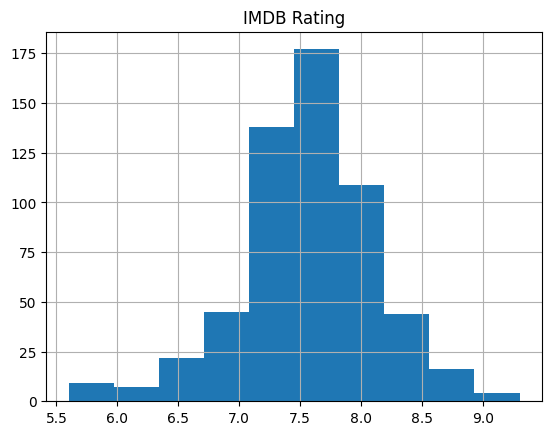

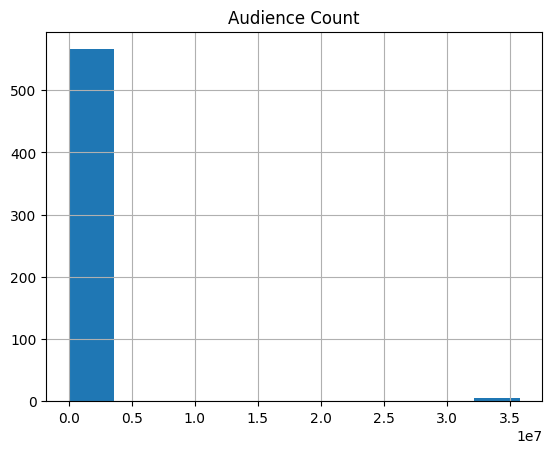

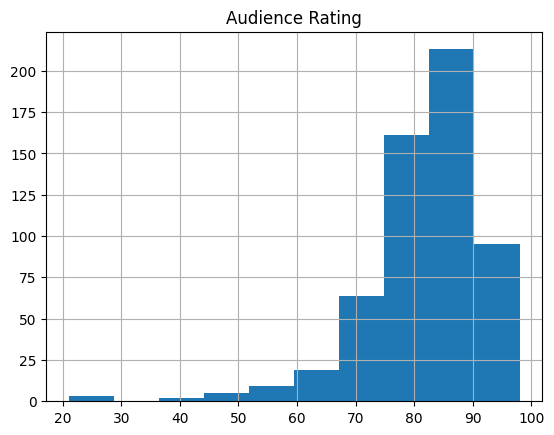

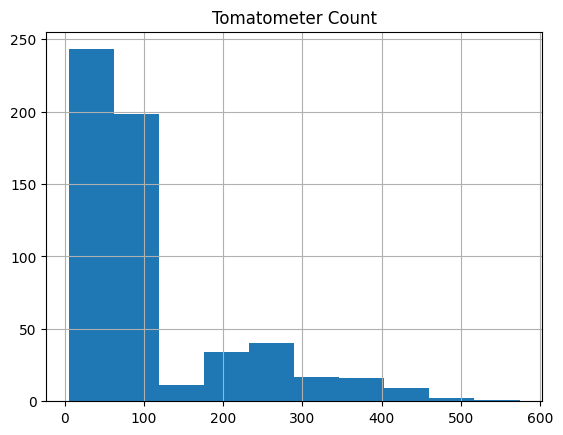

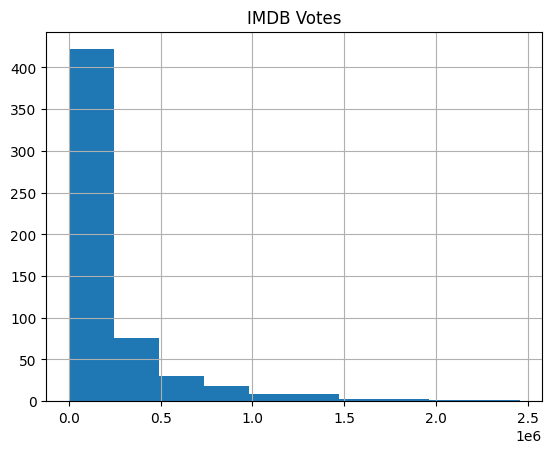

In [30]:
columns = ['IMDB Rating', 'Audience Count', 'Audience Rating', 'Tomatometer Count', 'IMDB Votes']
for column in columns:
    data.hist(column)

**Заключение:**
- выбросы затрудняют чтение данных в столбцах 'Audience Count', 'Audience Rating', 'Tomatometer Count', 'IMDB Votes';
- на гистограмме Audience Rating данные смещены вправо.

### Изучение и обработка выбросов

Учитывая приведенные выше результаты, создадим DataFrame без этих выбросов. Выбросы можно идентифицировать путем определения нижнего/верхнего предела нормального диапазона значений.

In [31]:
outlier = data[['Audience Count', 'Audience Rating', 'Tomatometer Count', 'IMDB Votes']]
outlier

,Audience Count,Audience Rating,Tomatometer Count,IMDB Votes
0,3530,78.0,46,12221
1,841628,83.0,108,3439
2,841628,73.0,108,1257
3,1813,21.0,24,6890
4,841628,63.0,108,765
...,...,...,...,...
566,841628,75.0,113,65380
567,841628,81.0,113,57976
568,841628,81.0,113,122269
569,841628,85.0,113,102807


Определим нижние Q1 и верхние Q3 пределы выбросов.

In [32]:
Q1 = outlier.quantile(0.25)
Q1

Audience Count       9243.5
Audience Rating        77.0
Tomatometer Count      33.0
IMDB Votes           9660.5
Name: 0.25, dtype: float64

In [33]:
Q3 = outlier.quantile(0.75)
Q3

Audience Count       438217.0
Audience Rating          89.0
Tomatometer Count       113.0
IMDB Votes           259429.0
Name: 0.75, dtype: float64

Вычислим межквартильный размах и создадим данные без выбросов

In [34]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,Audience Count,Audience Rating,Tomatometer Count,IMDB Votes
0,3530,78.0,46,12221
1,841628,83.0,108,3439
2,841628,73.0,108,1257
4,841628,63.0,108,765
5,29160,62.0,108,2004
...,...,...,...,...
566,841628,75.0,113,65380
567,841628,81.0,113,57976
568,841628,81.0,113,122269
569,841628,85.0,113,102807


Отфильтрованные данные сохраним в новом датафрейме

In [35]:
# Копирование индексов
index_list = list(data_filtered.index.values)

data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,True,1927,144,"Drama,Romance,War",7.5,12221,...,Certified-Fresh,93.000000,46,Upright,78.0,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,False,1927,110,"Drama,Romance",7.7,3439,...,Certified-Fresh,91.091255,108,Spilled,83.0,841628,21,96,12,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,False,1928,84,"Crime,Drama,Film-Noir",6.7,1257,...,Certified-Fresh,91.091255,108,Upright,73.0,841628,21,96,12,3111c2d8-0908-4093-8ff3-99c89f2f2f08
4,4,Alibi,1928/29,Feature Productions,False,1929,91,"Action,Crime,Romance",5.8,765,...,Certified-Fresh,91.091255,108,Upright,63.0,841628,21,96,12,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,False,1929,130,"Comedy,Music",5.7,2004,...,Fresh,85.153374,108,Upright,62.0,29160,21,96,12,689f22d5-a700-4ce1-b9be-65652f32c186


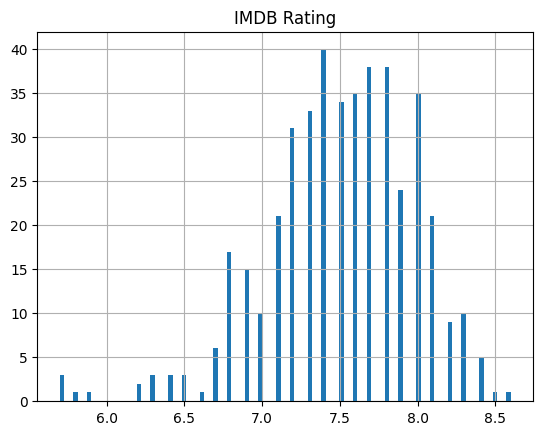

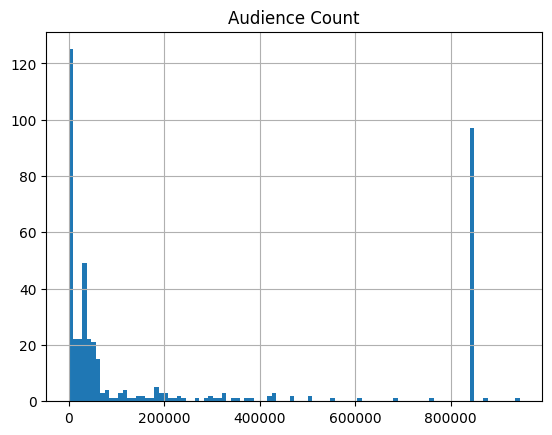

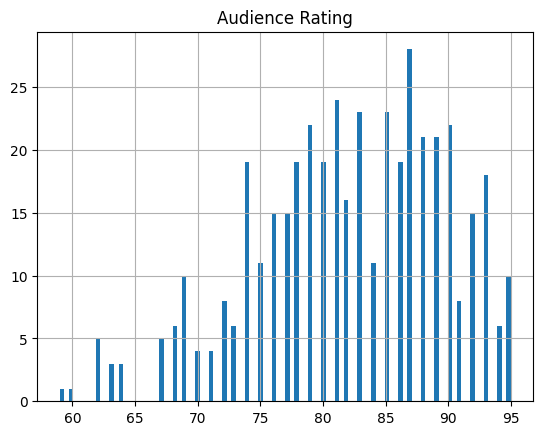

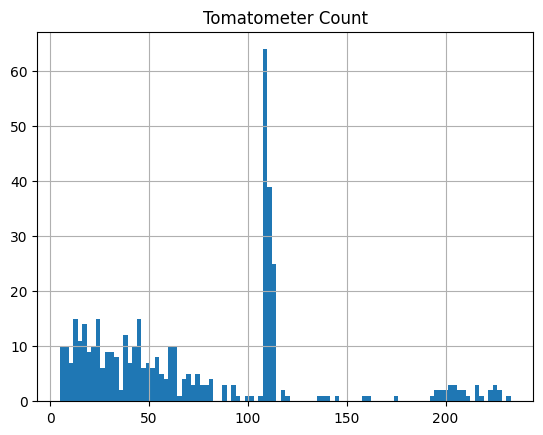

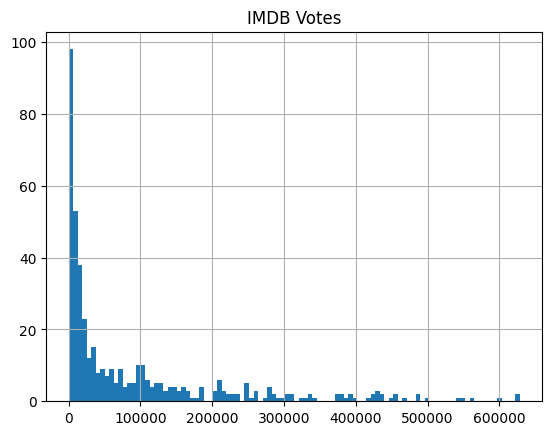

In [36]:
for column in columns:
    data_filtered.hist(column, bins=100)

**Заключение:**
- из-за заполнения столбцов по средним по другим признакам, какие-то значения встречаются часто, поэтому некоторые гистограммы выглядят странно, например, в Audience Count было очень много пропусков, из-за чего самые частые значения это 841628.874525, 29160.754601 и 12719.153846 (моя техника заполнения оказалась не достаточно хороша);
- после удаления выбросов столбец Audience Rating выглядит более симметрично.

### Изучение основных параметров без выбросов

[[<Axes: title={'center': 'Audience Rating'}>]]
[[<Axes: title={'center': 'Audience Rating'}>]]


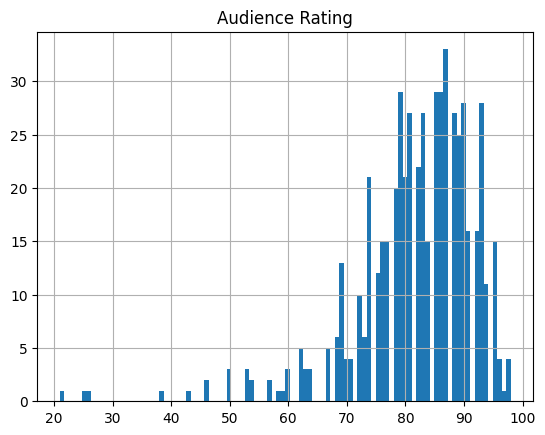

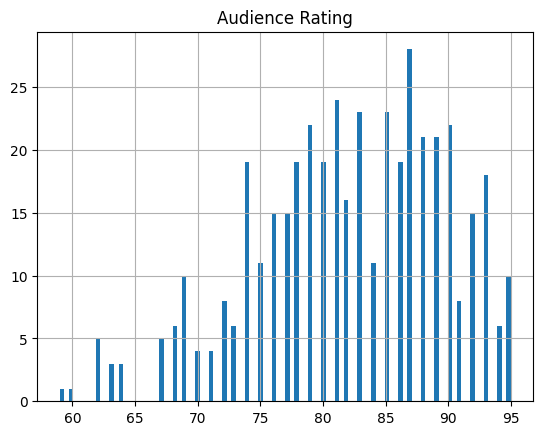

In [37]:
print (data.hist('Audience Rating', bins=100))
print (data_filtered.hist('Audience Rating', bins=100))

Наибольшее значение рэйтинга снизилось с (примерно) 37 до 25, а наклон влево говорит о том, что медиана немного больше среднего.

### Графики рассеивания 

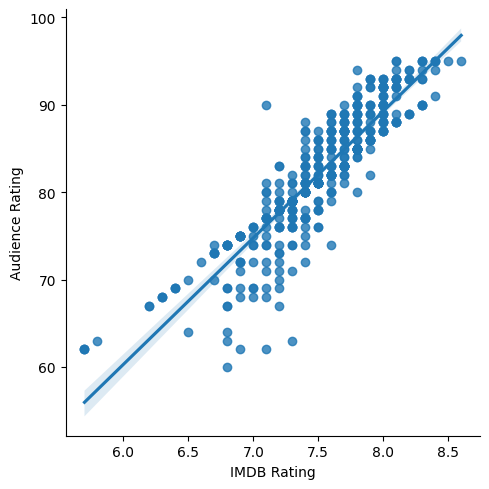

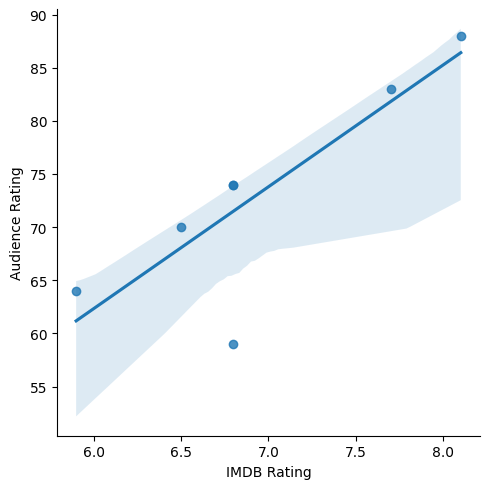

In [38]:
sns.lmplot(data_filtered[data_filtered['Audience Status'] == "Upright"], x='IMDB Rating', y='Audience Rating')
sns.lmplot(data_filtered[data_filtered['Audience Status'] == "Spilled"], x='IMDB Rating', y='Audience Rating')

IMBD и Audience Rating сильно коррелируют, но слабо влияют на Audience Status

### Boxplot 

<Axes: title={'center': 'Audience Rating'}, xlabel='Audience Status'>

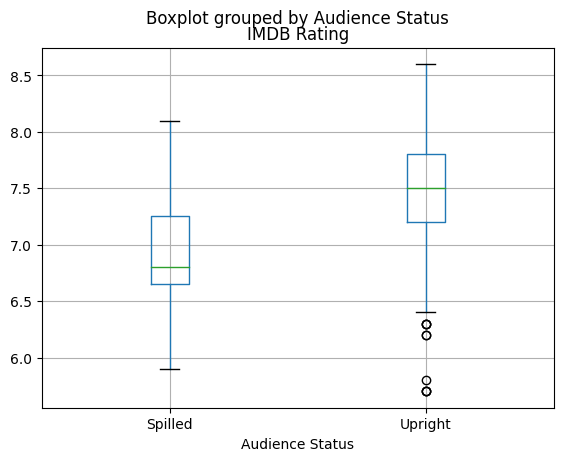

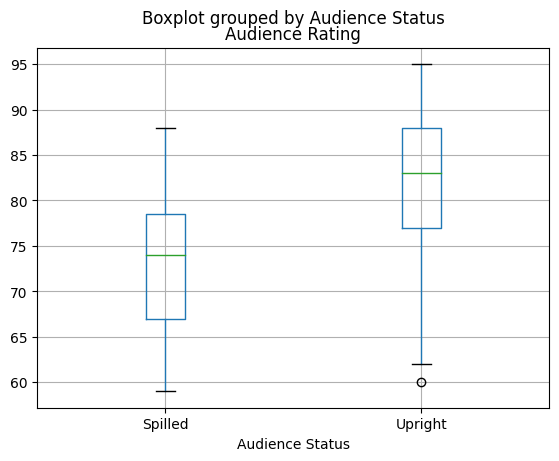

In [39]:
data_filtered.boxplot(by='Audience Status', column='IMDB Rating', grid=True)
data_filtered.boxplot(by='Audience Status', column='Audience Rating', grid=True)

Оба графика показали, что чем выше рейтинг, тем выше статус.